# Name: Kyle Hu
### Date: August 20, 2025

<style>
.jp-Notebook {
    padding: var(--jp-notebook-padding);
    margin-left: 160px;
    outline: none;
    overflow: auto;
    background: var(--jp-layout-color0);
}
</style>

<img src="https://cdn.nba.com/logos/nba/1610612760/primary/L/logo.svg" alt="logo" style="position: fixed; top: -40px; left: 5px; height: 250px;">

# Introduction  

The purpose of this project is to gauge your technical skills and problem solving ability by working through something similar to a real NBA data science project. You will work your way through this R Markdown document, answering questions as you go along. Please begin by adding your name to the "author" key in the YAML header. When you're finished with the document, come back and type your answers into the answer key at the top. Please leave all your work below and have your answers where indicated below as well. Please note that we will be reviewing your code so make it clear, concise, and **avoid long printouts.** Feel free to add in as many new code chunks as you'd like.

Remember that we will be grading the quality of your code and visuals alongside the correctness of your answers. Please try to use the tidyverse as much as possible (instead of base R and explicit loops). Please do not bring in any outside data, and use the provided data as truth (for example, some "home" games have been played at secondary locations, including TOR's entire 2020-21 season. These are not reflected in the data and you do not need to account for this.) Note that the OKC and DEN 2024-25 schedules in `schedule_24_partial.csv` intentionally include only 80 games, as the league holds 2 games out for each team in the middle of December due to unknown NBA Cup matchups. Do not assign specific games to fill those two slots.      

**Note:**    

**Throughout this document, any `season` column represents the year each season started. For example, the 2015-16 season will be in the dataset as 2015. We may refer to a season by just this number (e.g. 2015) instead of the full text (e.g. 2015-16).**   

# Answers  

## Part 1      

**Question 1:** 26 4-in-6 stretches in OKC's draft schedule.   

**Question 2:** 25.1 4-in-6 stretches on average.  

**Question 3:**    

- Most 4-in-6 stretches on average: CHA (28.0)    
- Fewest 4-in-6 stretches on average: NYK (22.3)       

**Question 4:** This is a written question. Please leave your response in the document under Question 4.          

**Question 5:**   

- BKN Defensive eFG%: 54.3%   
- When opponent on a B2B: 53.5%    

## Part 2  

Please show your work in the document, you don't need anything here.     

## Part 3    
 
**Question 8:**    

- Most Helped by Schedule: NYK (5.9 wins)     
- Most Hurt by Schedule: POR (-6.5 wins)     
  


# Setup and Data    

In [1]:
import pandas as pd
# Note, you will likely have to change these paths. If your data is in the same folder as this project, 
# the paths will likely be fixed for you by deleting ../../Data/schedule_project/ from each string.
schedule = pd.read_csv("schedule.csv")
draft_schedule = pd.read_csv("schedule_24_partial.csv")
locations = pd.read_csv("locations.csv")
game_data = pd.read_csv("team_game_data.csv")

## Part 1 -- Schedule Analysis               

In this section, you're going to work to answer questions using NBA scheduling data.   

### Question 1  

**QUESTION:** How many times are the Thunder scheduled to play 4 games in 6 nights in the provided 80-game draft of the 2024-25 season schedule? (Note: clarification, the stretches can overlap, the question is really “How many games are the 4th game played over the past 6 nights?”)     

 

In [2]:
# Convert the dates to dateandtime format
draft_schedule['gamedate'] = pd.to_datetime(draft_schedule['gamedate'])

# Extract OKC's games and create a new column of the differences between days
okc_games = draft_schedule.loc[draft_schedule['team'] == 'OKC', :].copy().sort_values('gamedate')

okc_games['time_diff'] = okc_games['gamedate'].diff().dt.days

count = 0 
# lst = []

# Use a sliding window approach to count the number of games that are the first of four games in six nights
for i in range(1, len(okc_games)-2):
    if okc_games.iloc[i, 6] + okc_games.iloc[i+1, 6] + okc_games.iloc[i+2, 6] <= 5:
        count += 1
        # lst.append(i-1)



print(count)



26


<strong><span style="color:red">ANSWER 1:</span></strong>   

26 4-in-6 stretches in OKC's draft schedule.   

### Question 2     

**QUESTION:** From 2014-15 to 2023-24, what is the average number of 4-in-6 stretches for a team in a season? Adjust each team/season to per-82 games before taking your final average.   
  


In [3]:
# Convert the dates to dateandtime format, and initialize data structures to store the averages for Q2 and Q3
schedule['gamedate'] = pd.to_datetime(schedule['gamedate'])
league_avg_4in6_maps = []
league_avg_4in6 = []

# Calculates the average number of 4-in-6s for each nba team using a sliding window approach
for team in locations['team']:
    # Isolate each team's data
    team_games = schedule.loc[schedule['team'] == team, :].copy().sort_values('gamedate')

    team_games['time_diff'] = team_games['gamedate'].diff().dt.days

    count = 0 

    # Sliding window to count 4-in-6s
    for i in range(1, len(team_games)-2):
        if team_games.iloc[i, 6] + team_games.iloc[i+1, 6] + team_games.iloc[i+2, 6] <= 5:
            count += 1
    
    # Convert to per 82 first before storing
    league_avg_4in6_maps.append([team, round(count/len(team_games)*82, 2)])
    league_avg_4in6.append(count/len(team_games)*82)


league_ovr_avg = round(sum(league_avg_4in6)/len(league_avg_4in6), 2)
print(league_ovr_avg)








25.05


<strong><span style="color:red">ANSWER 2:</span></strong>  

25.1 4-in-6 stretches on average.  

### Question 3  

**QUESTION:** Which of the 30 NBA teams has had the highest average number of 4-in-6 stretches between 2014-15 and 2023-24? Which team has had the lowest average? Adjust each team/season to per-82 games.     


In [4]:
max_team = ''
min_team = ''
max_4in6 = league_avg_4in6_maps[0][1]
min_4in6 = league_avg_4in6_maps[0][1]

# Loops over the list of team averages and finds the max/min
for team in league_avg_4in6_maps:
    if team[1] > max_4in6:
        max_4in6 = team[1]
        max_team = team[0]
    if team[1] < min_4in6:
        min_4in6 = team[1]
        min_team = team[0]

print(f'The team with the highest average number of 4-in-6 stretches between 2014-15 and 2023-24 is {max_team}, with an average of {max_4in6} 4-in-6 stretches.')
print(f'The team with the lowest average number of 4-in-6 stretches between 2014-15 and 2023-24 is {min_team}, with an average of {min_4in6} 4-in-6 stretches.')

The team with the highest average number of 4-in-6 stretches between 2014-15 and 2023-24 is CHA, with an average of 28.02 4-in-6 stretches.
The team with the lowest average number of 4-in-6 stretches between 2014-15 and 2023-24 is NYK, with an average of 22.31 4-in-6 stretches.


<strong><span style="color:red">ANSWER 3:</span></strong>  

- Most 4-in-6 stretches on average: CHA (28.0)     
- Fewest 4-in-6 stretches on average: NYK (22.3)       

### Question 4  

**QUESTION:** Is the difference between most and least from Q3 surprising, or do you expect that size difference is likely to be the result of chance?    

In [5]:
# The difference is 5.71 stretches
print(round(max_4in6-min_4in6, 2))


5.71


<strong><span style="color:red">ANSWER 4:</span></strong>  
A difference of 5.7 4-in-6 stretches per season throughout a 10 year span is somewhat surprising, given that if the schedule is completely randomized, this difference should theoretically normalize to 0. What makes the statistic more fascinating is the fact that the Charlotte Hornets, one of the smallest markets in the NBA, are put at the largest disadvantage, while the New York Knicks, one of the largest markets in the association, are given an advantage. 

However, if we zoom out to the big picture, it doesn't seem all that surprising, as a 5.7 difference isn't really too extreme throughout 6 months. For instance, CHA may have a 4-in-6 but NYK may have a 4-in-7 or a 5-in-8, which looks slightly worse for CHA but would require additional context to determine the impact of each type of stretch such as whether or not the back-to-back's require travel or the strength of schedule involved. Also, geography may play a role and cause slight discrepancies. For example, teams that are located closer to other teams may be allocated more back-to-backs as the negative impact of travelling during a back-to-back would be mitigated. Overall, the difference in the number of 4-in-6 stretches throughout the NBA is probably more of a coincidence than deliberate manipulation of the schedule. 

### Question 5   

**QUESTION:** What was BKN's defensive eFG% in the 2023-24 season? What was their defensive eFG% that season in situations where their opponent was on the second night of back-to-back?  

In [6]:
# Convert the dates to dateandtime format
game_data['gamedate'] = pd.to_datetime(game_data['gamedate'])

# Extract BKN's defensive games and create a new column of the differences between days
bkn_def_games = game_data.loc[(game_data['def_team'] == 'BKN') & (game_data['season'] == 2023), :].copy().sort_values('gamedate')
bkn_def_games['time_diff'] = bkn_def_games['gamedate'].diff().dt.days

# Def eFG%
def_efg = (bkn_def_games.loc[:, 'fg2made'].sum() + 1.5 * bkn_def_games.loc[:, 'fg3made'].sum()) / bkn_def_games.loc[:, 'fgattempted'].sum()

# If BKN was on a BTB, their def eFG% jumps
def_efg_btb = (bkn_def_games.loc[bkn_def_games['time_diff'] == 1, 'fg2made'].sum() + 1.5 * bkn_def_games.loc[bkn_def_games['time_diff'] == 1, 'fg3made'].sum()) / bkn_def_games.loc[bkn_def_games['time_diff'] == 1, 'fgattempted'].sum()



# Now for the situations where BKN's opponents were on a BTB
# Looking at the data from an offensive team's perspective
off_game_data = game_data.sort_values(['off_team', 'gamedate']).copy()

# Calculate offensive team BTB indicator
off_game_data['off_time_diff'] = off_game_data.groupby('off_team')['gamedate'].diff().dt.days
off_game_data['off_btb'] = (off_game_data['off_time_diff'] == 1).astype(int)

# Filter for games where BKN is the defensive team in the 2023 season
bkn_def_games2 = off_game_data.loc[(off_game_data['def_team'] == 'BKN') & (off_game_data['season'] == 2023)].copy()

# Def eFG% when opponent is on 2nd night of a BTB
def_efg_opp_btb = (
    (bkn_def_games2.loc[bkn_def_games2['off_btb'] == 1, 'fg2made'].sum()
     + 1.5 * bkn_def_games2.loc[bkn_def_games2['off_btb'] == 1, 'fg3made'].sum())
    / bkn_def_games2.loc[bkn_def_games2['off_btb'] == 1, 'fgattempted'].sum()
)


print(f'BKN Defensive eFG% in the 2023-24 season: {100*round(def_efg, 4)}%')
print(f'BKN Defensive eFG% in the 2023-24 season on a BTB: {100*round(def_efg_btb, 4)}%')       
print(f'BKN Defensive eFG% in the 2023-24 when opponents were on a BTB: {100*round(def_efg_opp_btb, 4)}%')





BKN Defensive eFG% in the 2023-24 season: 54.35%
BKN Defensive eFG% in the 2023-24 season on a BTB: 58.36%
BKN Defensive eFG% in the 2023-24 when opponents were on a BTB: 53.49%


<strong><span style="color:red">ANSWER 5:</span></strong>  

- BKN Defensive eFG%: 54.3%   
- When opponent on a B2B: 53.5%    

## Part 2 -- Trends and Visualizations                   

This is an intentionally open ended section, and there are multiple approaches you could take to have a successful project. Feel free to be creative. However, for this section, please consider only the density of games and travel schedule, not the relative on-court strength of different teams.    

### Question 6   

**QUESTION:** Please identify at least 2 trends in scheduling over time. In other words, how are the more recent schedules different from the schedules of the past? Please include a visual (plot or styled table) highlighting or explaining each trend and include a brief written description of your findings.  


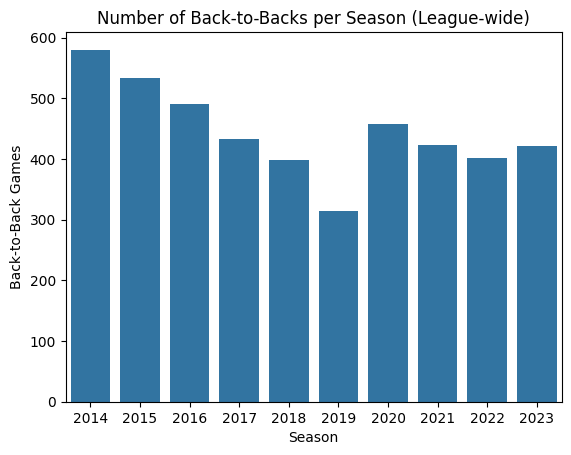

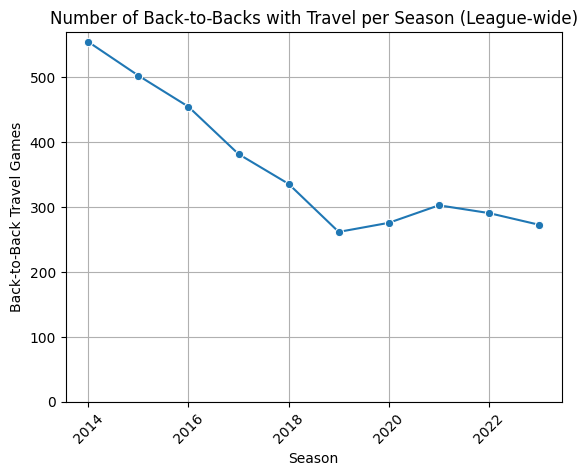

season
2014    580
2015    534
2016    491
2017    433
2018    398
2019    315
2020    457
2021    423
2022    401
2023    422
Name: time_diff, dtype: int64
season
2014    555
2015    503
2016    455
2017    382
2018    336
2019    262
2020    276
2021    303
2022    291
2023    273
Name: team, dtype: int64


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a separate df and add in the time difference column
games = schedule.sort_values(['team', 'gamedate'])
games['time_diff'] = games.groupby('team')['gamedate'].diff().dt.days


# Count the number of back-to-backs
btb_counts = (
    games[games['time_diff'] == 1]
    .groupby('season')['time_diff']
    .count()
)


# Function to determine if a stretch of games is considered travel
def road_travel(row, prev_row):
    if prev_row is None:
        return False
    # Home<->road is considered a travel, except for LAL<->LAC and NYK<->BKN which are not considered travels
    if (row['home'] == 1 and prev_row['home'] == 0) or (row['home'] == 0 and prev_row['home'] == 1):
        # Special cases for teams that are located in the same city
        same_city_pair = {('LAL','LAC'), ('NYK','BKN')}
        if (row['team'], prev_row['opponent']) in same_city_pair or \
           (prev_row['opponent'], row['team']) in same_city_pair:
            return False
        return True
    # Consider road-road cases
    if row['home'] == 0 and prev_row['home'] == 0:
        # Special cases for teams that are located in the same city
        same_city_pair = {('LAL','LAC'), ('NYK','BKN')}
        if (row['opponent'], prev_row['opponent']) in same_city_pair or \
           (prev_row['opponent'], row['opponent']) in same_city_pair:
            return False
        # Make sure that the road teams are distinct to be considered a travel night
        elif row['opponent'] != prev_row['opponent']:
            return True
    # Home-homes and road-roads where the opponents are the same are not considered travels    
    return False


# Detect travel
games['travel'] = False

for team, df in games.groupby('team'):
    prev = None
    for idx, row in df.iterrows():
        # Check if there is a travel between back-to-backs
        road_change = road_travel(row, prev)
        games.at[idx, 'travel'] = road_change
        prev = row


# Count the back-to-backs with travel
btb_travel_counts = (
    games[(games['time_diff'] == 1) & (games['travel'])]
    .groupby('season')['team']
    .count()
)



# BTB barplot
btb_plot = btb_counts.reset_index(name='btb_games')

sns.barplot(data=btb_plot, x='season', y='btb_games')
plt.title('Number of Back-to-Backs per Season (League-wide)')
plt.xlabel('Season')
plt.ylabel('Back-to-Back Games')
plt.show()


# BTB with travel line plot
btb_travel_plot = btb_travel_counts.reset_index(name='btb_travel_games')

sns.lineplot(data=btb_travel_plot, x='season', y='btb_travel_games', marker='o')
plt.title('Number of Back-to-Backs with Travel per Season (League-wide)')
plt.xlabel('Season')
plt.ylabel('Back-to-Back Travel Games')
plt.xticks(rotation=45)  
plt.ylim(0, None)
plt.grid(True)
plt.show()

print(btb_counts)
print(btb_travel_counts)



<strong><span style="color:red">ANSWER 6:</span></strong>  
Above are graphs displaying the league-wide total number of back-to-backs as well as the total number of back-to-backs with travel between the consecutive nights per season from 2014 to 2023. 

The number of btbs gives us context into the schedule density, as btb games are generally considered undesirable due to the minimal rest involved and has led to players strategically resting the first or second night of a btb. We can see from the barplot that the number of btbs has been steadily decreasing since 2014 (~30% decrease through 10 years), which was probably meant to mitigate the mileage on NBA players' bodies. 

Even though back-to-backs are widely negatively conceived, the true detriment from a btb comes more from the need to travel between the first and second nights, rather than the fact that the games are consecutive. NBA players are well equipped with the physical stamina and durability to sustain playing back-to-back games once in a while provided that they are afforded time to properly recover and recalibrate between those games. However, if there is travel in between the games, then that recovery process is severely hindered, and teams may have to deal with situations like finishing the game one night, then immediately boarding a plane to fly to another city, arriving at the hotel 4am in the morning, and then having to wake up the next day to play the second night of a btb. These types of stretches are usually the most grueling parts of the season.

From the lineplot, we see that the number of back-to-backs with travel have also been on a consistent decline since 2014, even moreso than btbs overall. (~50% decrease from 2014-2023 for the btb with travel.) This shows that the league is clearly paying attention to this aspect of the schedule. Even more fascinating, we can see that the percentage of btbs that require travel out of all btbs have also been decreasing (!). Teams used to play nearly all of their back-to-back stretches with travel in between, but in recent years (especially post 2020), there has been a sharp decline in those types of btbs, and the percentage of btbs requiring travel has dipped to around 65%. This is a significant shift that should benefit the health of players and help limit travel-related stress across the NBA.


### Question 7    

**QUESTION:** Please design a plotting tool to help visualize a team’s schedule for a season. The plot should cover the whole season and should help the viewer contextualize and understand a team’s schedule, potentially highlighting periods of excessive travel, dense blocks of games, or other schedule anomalies. If you can, making the plots interactive (for example through the plotly package) is a bonus.   

Please use this tool to plot OKC and DEN's provided 80-game 2024-25 schedules.   

In [9]:
from haversine import haversine
import plotly.express as px
import plotly.graph_objects as go

# Load schedules
games = pd.read_csv('schedule_24_partial.csv', parse_dates=['gamedate'])
locations = pd.read_csv('locations.csv')

# Merge team coordinates
games = games.merge(
    locations[['team','latitude','longitude']],
    on='team',
    how='left'
).rename(columns={'team':'team_x','latitude':'team_lat','longitude':'team_lon'})

# Merge opponent coordinates
games = games.merge(
    locations[['team','latitude','longitude']],
    left_on='opponent',
    right_on='team',
    how='left'
).rename(columns={'latitude':'opp_lat','longitude':'opp_lon'}).drop(columns=['team'])

# Determine actual game location
games['game_lat'] = games.apply(lambda row: row['team_lat'] if row['home']==1 else row['opp_lat'], axis=1)
games['game_lon'] = games.apply(lambda row: row['team_lon'] if row['home']==1 else row['opp_lon'], axis=1)

# Sort by team and date
games = games.sort_values(['team_x','gamedate']).copy()

# Days between games
games['days_between_games'] = games.groupby('team_x')['gamedate'].diff().dt.days.fillna(0)

# Travel distance between consecutive games
def compute_travel_distance(df):
    coords = list(zip(df['game_lat'], df['game_lon']))
    distances = [0] + [haversine(coords[i-1], coords[i]) for i in range(1, len(coords))]
    return round(pd.Series(distances, index=df.index), 2)

games['travel_distance_km'] = games.groupby('team_x', group_keys=False).apply(compute_travel_distance)

# --- Adjust all games in IST and ASB ranges to prevent skew ---
adjust_dates = pd.to_datetime(
    ["2024-12-08","2024-12-09","2024-12-10","2024-12-11","2024-12-12",
     "2024-12-13","2024-12-14","2024-12-15","2024-12-16","2024-12-17","2024-12-18","2024-12-19",
     "2025-02-14","2025-02-15","2025-02-16","2025-02-17","2025-02-18","2025-02-19","2025-02-20","2025-02-21"]
)
mask = games['gamedate'].isin(adjust_dates)
games.loc[mask, 'days_between_games'] = 2
games.loc[mask, 'travel_distance_km'] = 0
# -----------------------------------------------------

# Filter for OKC and DEN
teams_to_plot = ['OKC','DEN']
games_filtered = games[games['team_x'].isin(teams_to_plot)].rename(columns={'team_x': 'Team'})

# Determine point sizes based on busyness (kept in code, not shown in hover)
def point_size(diff):
    if diff == 1:
        return 10       # back-to-back
    elif diff == 2:
        return 2       # 2-day gap
    else:
        return 0.5        # 3+ days

games_filtered['point_size'] = games_filtered['days_between_games'].apply(point_size)

# Base scatter
fig = px.scatter(
    games_filtered,
    x='gamedate',
    y='travel_distance_km',
    color='Team',
    size='point_size',
    hover_data={'opponent':True,
                'home':True,
                'travel_distance_km':True,
                'days_between_games':True,  # appears in hover
                'point_size':False},         # hidden in hover
    labels={'days_between_games':'Days Between Games','travel_distance_km':'Travel Distance (km)','gamedate':'Game Date'},
    color_discrete_map={'OKC': 'blue', 'DEN': 'orange'}
)

# Add faint dotted lines connecting points
for team in games_filtered['Team'].unique():
    team_df = games_filtered[games_filtered['Team'] == team].sort_values('gamedate')
    fig.add_trace(go.Scatter(
        x=team_df['gamedate'],
        y=team_df['travel_distance_km'],
        mode='lines',
        line=dict(color='blue' if team == 'OKC' else 'orange', width=0.5, dash='dot'),
        showlegend=False,
        opacity=0.3
    ))

# Shaded regions for IST and ASB
fig.add_vrect(
    x0="2024-12-08", x1="2024-12-19",
    fillcolor="green", opacity=0.2,
    annotation_text="In-Season Tournament",
    annotation_position="top left"
)

fig.add_vrect(
    x0="2025-02-14", x1="2025-02-20",
    fillcolor="pink", opacity=0.2,
    annotation_text="All-Star Break",
    annotation_position="top left"
)

# Extend y-axis slightly below 0 so points at 0 are visible
y_min = -10
fig.update_yaxes(range=[y_min, None])
fig.update_layout(
    title="OKC & DEN Time Gap and Travel Distance Between Games (2024-25)",
    yaxis_title="Travel Distance (km)",
    margin=dict(l=60, r=40, t=80, b=80)
)

# --- Add horizontal red dotted line at 1000 km for heavy travel ---
fig.add_hline(y=1000, line_dash='dot', line_color='black', opacity=0.6)

fig.show()


C:\Users\12898\AppData\Local\Temp\ipykernel_35060\1626170498.py:40: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  games['travel_distance_km'] = games.groupby('team_x', group_keys=False).apply(compute_travel_distance)


<strong><span style="color:red">ANSWER 7:</span></strong>  
OKC is represented by blue, while DEN is represented by orange. The y-axis displays how much each team had to travel between each game, and the size of the points represents the density of the schedule (back-to-backs are large, games after a long rest are small). 

### Question 8    

**QUESTION:** Using your tool, what is the best and worst part of OKC’s 2024-25 draft schedule? Please give your answer as a short brief to members of the front office and coaching staff to set expectations going into the season. You can include context from past schedules.  



<strong><span style="color:red">ANSWER 8:</span></strong>  
Building off question 6, we can use the concepts of back-to-backs / back-to-backs with travel to contexualize OKC's 2024-25 schedule. From the visualization, we can observe that OKC starts the season off with a decent amount of travel and two early btbs (Oct 24-Nov 8). OKC needs to be mentally prepared to earn every win if they are to start the season off strong. 

From Nov 8 all the way to the new year, OKC's schedule is very light compared to the rest of the season, with relatively low travelling and btbs (the points are all lower on the graph and smaller in scale). (This is possibly subject to change from the in-season tournament though). 

In the month of January, OKC should expect a heavy density of games, as the month is littered with 5 back-to-backs. However, the saving grace is the relatively lower amount of travel required throughout the month.

The two weeks immediately preceding and succeeding the all-star break are heavy with travel btbs, but the impact is minimized by the week-long break in between.

After that, OKC can enjoy another very light stretch of scheduling from mid march to the end of the regular season, with minimal btbs and moderate travel which is largely negated by the rest in between travelling days and the proximity of the travel. This should give them ample time to rest their stars and/or experiment with different lineup combinations and substitution patterns before the playoffs begin.

Sidenote: We can see from earlier calculations the difference that the lowering of btbs and btbs with travel makes over the course of an entire season. In recent seasons, the number of btbs have been hovering in the low 400s as opposed to the near 600 btbs a decade ago. This favorable change allows for the btbs to be evenly spread out through the season, which will minimize large, dense blocks in the scheduling from 4-in-6s or 6-in-9s. The btbs with travel have dipped to the high 200s in recent times, which is a stark contrast to the 500-600 such stretches seen 10 years ago. This pushes some of the large circles on the graph to the bottom, meaning that there should be enough time to recover from the no travel aspect of the btb. Overall modern scheduling is vastly more merciful on the entire league, which can help preserve the quality of play in both the regular season and the playoffs.


## Part 3 -- Modeling     

### Question 9   

**QUESTION:** Please estimate how many more/fewer regular season wins each team has had due to schedule-related factors from 2019-20 though 2023-24. Your final answer should have one number for each team, representing the total number of wins (not per 82, and not a per-season average). You may consider the on-court strength of the scheduled opponents as well as the impact of travel/schedule density. Please include the teams and estimates for the most helped and most hurt in the answer key.    

If you fit a model to help answer this question, please write a paragraph explaining your model, and include a simple model diagnostic (eg a printed summary of a regression, a variable importance plot, etc).    

In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# --- Load the schedule ---
schedule2 = pd.read_csv('schedule.csv', parse_dates=['gamedate'])
schedule2 = schedule2[schedule2['season'].between(2019, 2023)]

# Convert wins to numeric
schedule2['wins'] = schedule2['win']

# Sort by team and date
schedule2 = schedule2.sort_values(['team', 'gamedate'])

# --- Compute time differences ---
schedule2['time_diff'] = schedule2.groupby('team')['gamedate'].diff().dt.days

# --- Detect travel between games ---
def road_travel(row, prev_row):
    if prev_row is None:
        return False
    same_city_pair = {('LAL','LAC'), ('NYK','BKN')}
    # Home<->Road
    if (row['home']==1 and prev_row['home']==0) or (row['home']==0 and prev_row['home']==1):
        if (row['team'], prev_row['opponent']) in same_city_pair or \
           (prev_row['opponent'], row['team']) in same_city_pair:
            return False
        return True
    # Road<->Road
    if row['home']==0 and prev_row['home']==0 and row['opponent'] != prev_row['opponent']:
        if (row['opponent'], prev_row['opponent']) in same_city_pair or \
           (prev_row['opponent'], row['opponent']) in same_city_pair:
            return False
        return True
    return False

schedule2['travel'] = False
for team, df in schedule2.groupby('team'):
    prev = None
    for idx, row in df.iterrows():
        schedule2.at[idx, 'travel'] = road_travel(row, prev)
        prev = row

# --- Aggregate B2B and B2B-with-travel counts per team-season ---
team_stats = (
    schedule2.groupby(['team', 'season'])
    .agg(
        wins=('wins', 'sum'),
        b2b_count=('time_diff', lambda x: (x==1).sum()),
        b2b_travel=('travel', lambda x: ((x) & (schedule2.loc[x.index, 'time_diff']==1)).sum())
    )
    .reset_index()
)

# --- League average per season ---
league_avg = (
    team_stats.groupby('season')[['b2b_count','b2b_travel']]
    .mean()
    .rename(columns={'b2b_count':'avg_b2b','b2b_travel':'avg_b2b_travel'})
    .reset_index()
)

team_stats = team_stats.merge(league_avg, on='season', how='left')

# --- Deviations from league average ---
team_stats['b2b_diff'] = team_stats['b2b_count'] - team_stats['avg_b2b']
team_stats['b2b_travel_diff'] = team_stats['b2b_travel'] - team_stats['avg_b2b_travel']

# --- Fit linear regression ---
X = team_stats[['b2b_diff','b2b_travel_diff']]
y = team_stats['wins']

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficient for B2B deviation:", model.coef_[0])
print("Coefficient for B2B-with-travel deviation:", model.coef_[1])

# --- Predicted schedule impact ---
team_stats['predicted_impact'] = model.coef_[0]*team_stats['b2b_diff'] + \
                                 model.coef_[1]*team_stats['b2b_travel_diff']

# Sum across seasons
total_impact = team_stats.groupby('team')['predicted_impact'].sum().sort_values()

print("\nEstimated total schedule impact on wins (2019-20 through 2023-24):")
print(total_impact)

print("\nMost helped team:", total_impact.idxmax(), "Impact:", total_impact.max().round(2))
print("Most hurt team:", total_impact.idxmin(), "Impact:", total_impact.min().round(2))



from sklearn.metrics import r2_score

# Predictions
y_pred = model.predict(X)

# R-squared
r2 = r2_score(y, y_pred)
print("R-squared:", round(r2, 2))

# Coefficients
print("Intercept:", model.intercept_)
print("Coefficient for B2B deviation:", model.coef_[0].round(2))
print("Coefficient for B2B-with-travel deviation:", model.coef_[1].round(2))


Intercept: 38.86
Coefficient for B2B deviation: -0.9278023475153138
Coefficient for B2B-with-travel deviation: 0.3638364813355763

Estimated total schedule impact on wins (2019-20 through 2023-24):
team
POR   -6.513977
CLE   -3.403156
MEM   -3.330311
SAC   -3.039320
PHX   -3.002897
CHI   -2.875612
SAS   -2.602638
ATL   -2.311647
GSW   -1.911388
OKC   -1.547551
WAS   -1.383844
MIN   -1.110870
LAC   -0.983585
CHA   -0.819878
ORL   -0.092205
MIA    0.872019
MIL    0.872019
DET    0.999304
TOR    1.163011
UTA    1.272278
NOP    1.272278
DAL    1.563270
HOU    1.636114
BKN    1.763399
BOS    2.127236
IND    2.127236
PHI    3.655426
DEN    4.583229
LAL    5.147194
NYK    5.874867
Name: predicted_impact, dtype: float64

Most helped team: NYK Impact: 5.87
Most hurt team: POR Impact: -6.51
R-squared: 0.01
Intercept: 38.86
Coefficient for B2B deviation: -0.93
Coefficient for B2B-with-travel deviation: 0.36


<strong><span style="color:red">ANSWER 9:</span></strong>  

- Most Helped by Schedule: NYK (5.9 wins)     
- Most Hurt by Schedule: POR (-6.5 wins)    

This is a linear regression model that takes into account each team's total number of back-to-backs from 2019-2023 as well as a team's total amount of back-to-backs with travel. 

The model: wins = β0 ​+ β1​⋅b2b_diff + β2​⋅b2b_travel_diff + ε.

The idea is that the more btbs and/or btbs with travel that a team has, the more difficult their shedule is compared to the rest of the league. 



The model intercept is 38.86 (Average number of wins is around 39 if a team plays the league average number of btbs, a fair result that is close to .500). 

The coefficient for B2B deviation is -0.93 (More btbs lead to fewer wins on average). The coefficient for B2B-with-travel deviation is 0.36 (An interesting contradiction as the model predicts that more btbs with travel contribute to a slightly increased number of wins. Could be due to the small sample size or other intangible factors, but the overall btb coefficient aligns with intuition). 

The R-squared of the model is 0.01 (Talent and incentives like tanking are much better indicators of wins in a season, but scheduling does still contribute). 